In [16]:
import os

import matplotlib.pyplot as plt
import PIL.Image as PilImage
import textwrap, os
import math

# TODO:

✓ now that legs are unified, adjust torsos

✓ u16: adjust legs x -1 -> torso +1
✓ u18: adjust legs x -2 -> torso +2
✓ u19: adjust legs x -2 -> torso +2
✓ u59: adjust arms

✓ shotgun ur: 0, 0, 0, -1

✓ legwalkdown: 5,6,7,8 ordering

✓ unify pistol posing

✓ walk right head bob


✓ polish

✓ crawl?

✓ smg

✓ shotgun reload

✓ pistol reload

determine head separation strategy

silencer strategy


In [2]:
CLOUD_PATH = "/Users/rfoltz/Library/Mobile Documents/com~apple~CloudDocs/DJ2020 art assets /Spritesheets/64x64"

SHEET_DIR = "generic"

In [3]:
def parse_sprites(path, sprite_size):
    sprites = []
    im = PilImage.open(path)
    imgwidth, imgheight = im.size
    for i in range(0, imgheight, sprite_size):
        for j in range(0, imgwidth, sprite_size):
            box = (j, i, j+sprite_size, i+sprite_size)
            sprite = im.crop(box)
            sprites.append(sprite)
    return sprites

def combine(sprite1, sprite2):
    x = sprite1.copy()
    y = sprite2.copy()
    x.paste(y, (0, 0), y)
    return x

def display_images(images: [PilImage], columns=5, width=20, 
                   height=8, max_images=100, label_wrap_length=50, 
                   label_font_size=8):

    if not images:
        print("No images to display.")
        return 

    if len(images) > max_images:
        print(f"Showing {max_images} images of {len(images)}:")
        images=images[0:max_images]

    height = max(height, int(len(images)/columns) * height)
    plt.figure(figsize=(width, height))
    for i, image in enumerate(images):
        plt.subplot(int(len(images) / columns + 1), columns, i + 1)
        plt.imshow(image)
        plt.title(i, fontsize=label_font_size)

def gunwalk(sprites, gun_indexes=[0, 5, 10, 14, 18]):
    walk_down = [combine(leg_sprites[i], sprites[gun_indexes[0]]) for i in [5, 6, 7, 8]]
    walk_downright = [combine(leg_sprites[i], sprites[gun_indexes[1]]) for i in [9, 10, 11, 12]]
    walk_right = [combine(leg_sprites[i], sprites[gun_indexes[2]]) for i in [13, 14, 15, 16]]
    walk_rightup = [combine(leg_sprites[i], sprites[gun_indexes[3]]) for i in [17, 18, 19, 20]]
    walk_up = [combine(leg_sprites[i], sprites[gun_indexes[4]]) for i in [21, 22, 23, 24]]
    display_images(walk_down)
    display_images(walk_downright)
    display_images(walk_right)
    display_images(walk_rightup)
    display_images(walk_up)

def paste_head(sprite, head_index, offset=(16, -2)):
    x = sprite.copy()
    y = head_sprites[head_index].copy()
    x.paste(y, offset, y)
    return x

In [4]:
path = os.path.join(CLOUD_PATH, SHEET_DIR)

torso_path = os.path.join(path, 'Torso.png')
legs_path = os.path.join(path, 'Legs.png')
pistol_path = os.path.join(path, 'pistol.png')
smg_path = os.path.join(path, 'smg.png')
rifle_path = os.path.join(path, 'rifle.png')
shotgun_path = os.path.join(path, 'shotgun.png')
head_path = os.path.join(path, 'Head.png')

leg_sprites = parse_sprites(legs_path, 64)
torso_sprites = parse_sprites(torso_path, 64)
pistol_sprites = parse_sprites(pistol_path, 64)
smg_sprites = parse_sprites(smg_path, 64)
rifle_sprites = parse_sprites(rifle_path, 64)
shotgun_sprites = parse_sprites(shotgun_path, 64)
head_sprites = parse_sprites(head_path, 32)

# unarmed

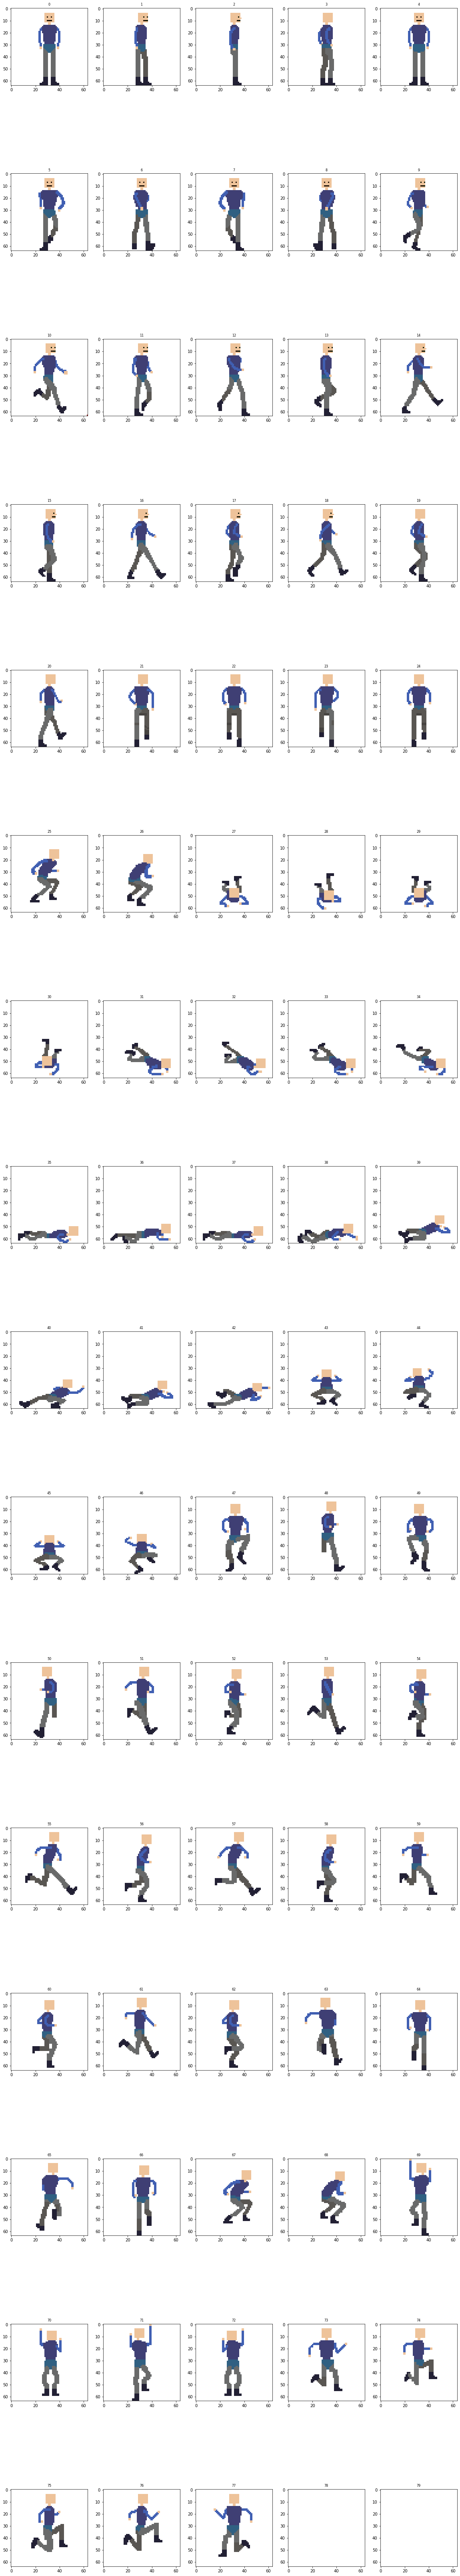

In [25]:
combined_sprites = []
for i in range(len(leg_sprites)):
    sprite = combine(leg_sprites[i], torso_sprites[i])
    if i < 4:
        j = i % 4
        sprite = paste_head(sprite, j)
    elif i < 25:
        j = int((i - 4) / 5)
        sprite = paste_head(sprite, j)
    combined_sprites.append(sprite)

display_images(combined_sprites)

# pistol

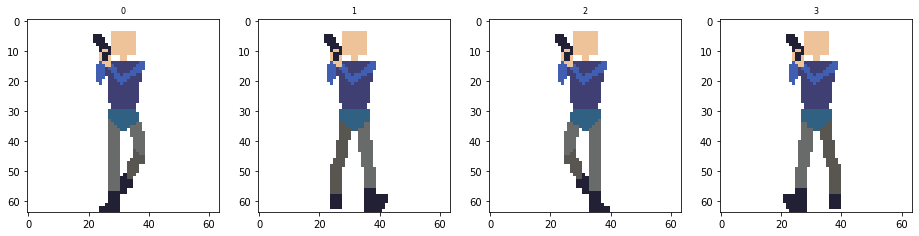

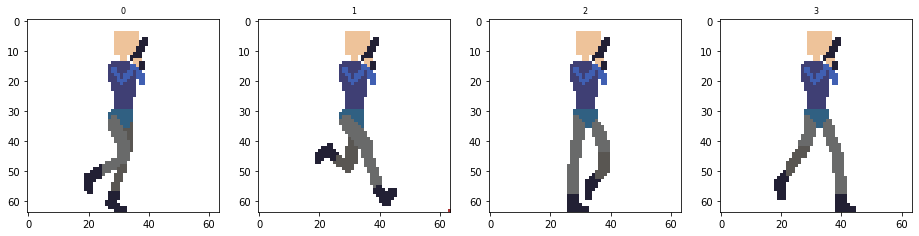

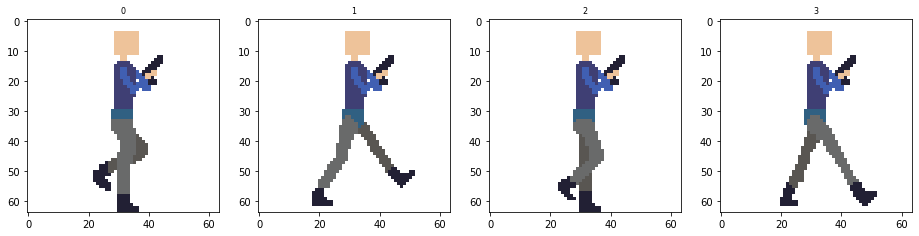

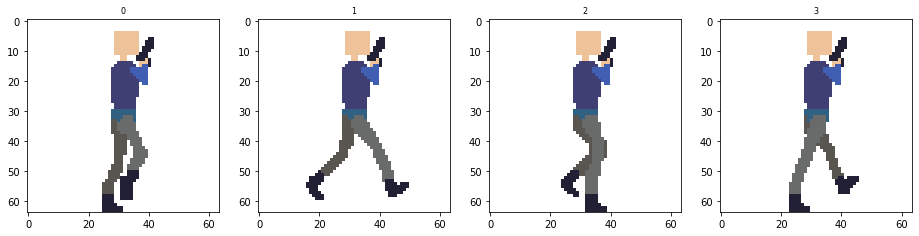

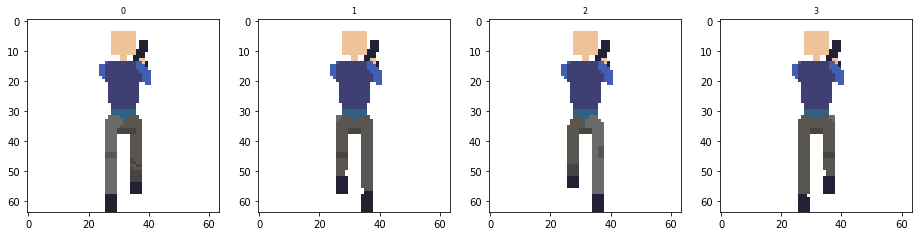

In [6]:
gunwalk(pistol_sprites, gun_indexes=[0, 3, 6, 9, 12])

# smg

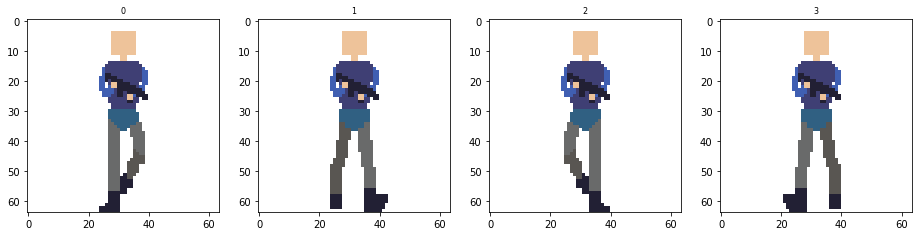

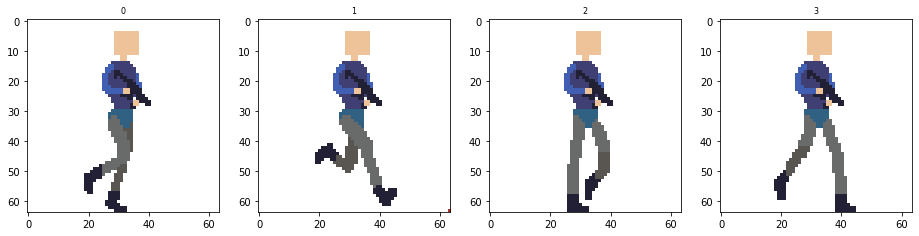

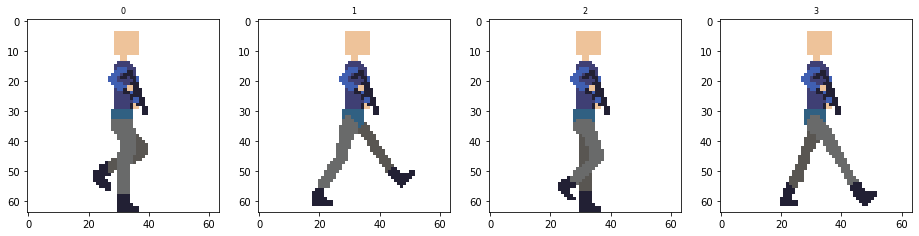

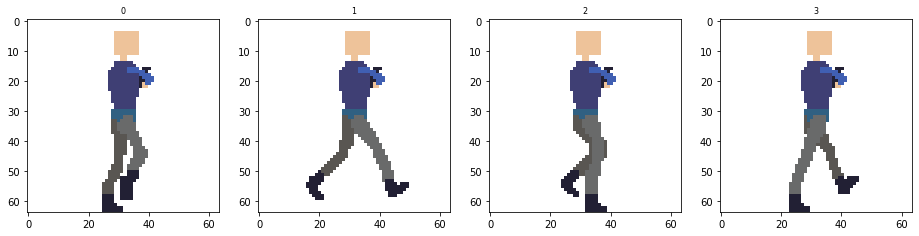

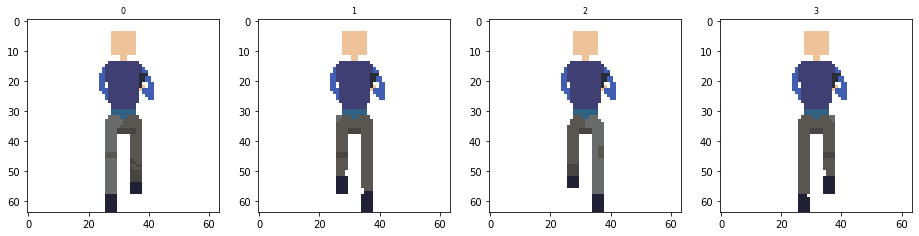

In [7]:
gunwalk(smg_sprites, gun_indexes=[0, 3, 6, 9, 12])

# rifle

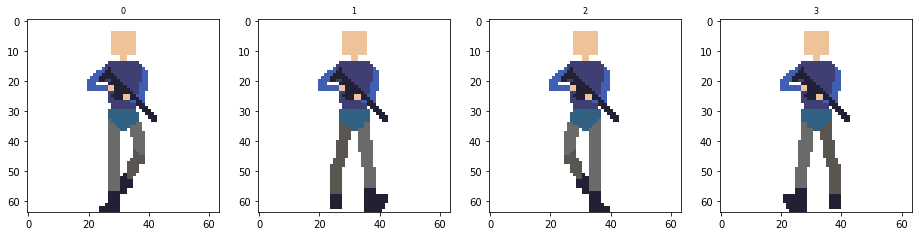

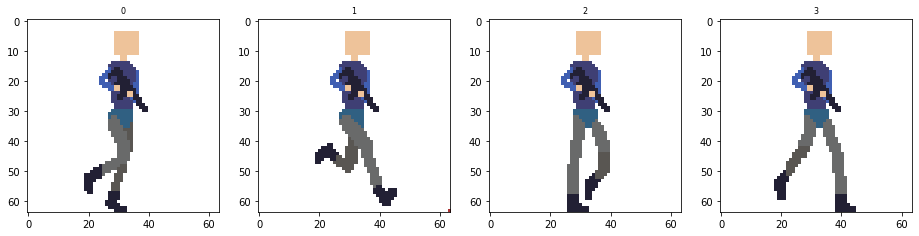

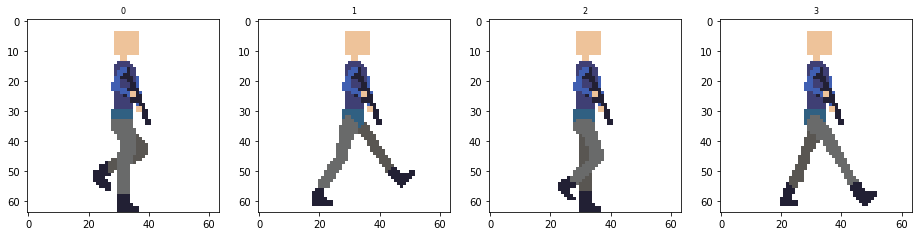

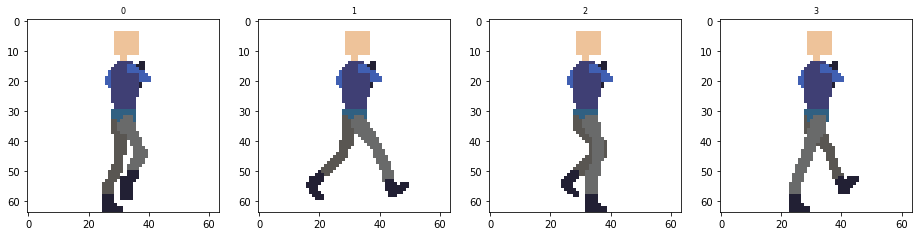

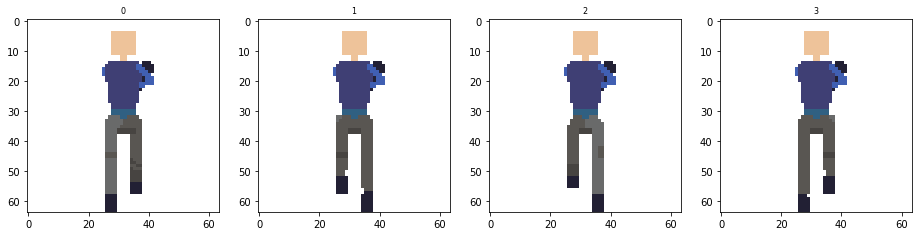

In [8]:
gunwalk(rifle_sprites, gun_indexes=[0, 3, 6, 9, 12])

# shotgun

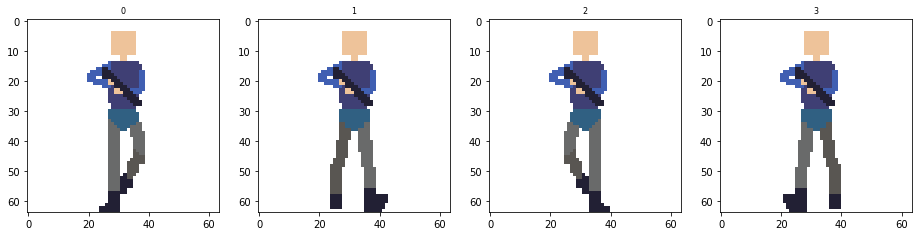

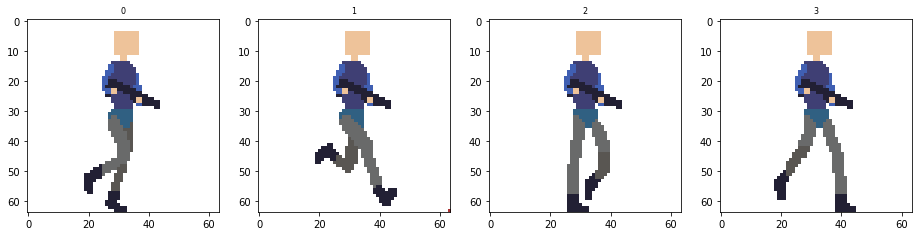

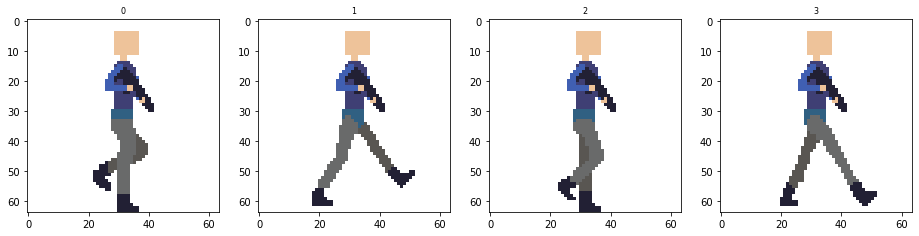

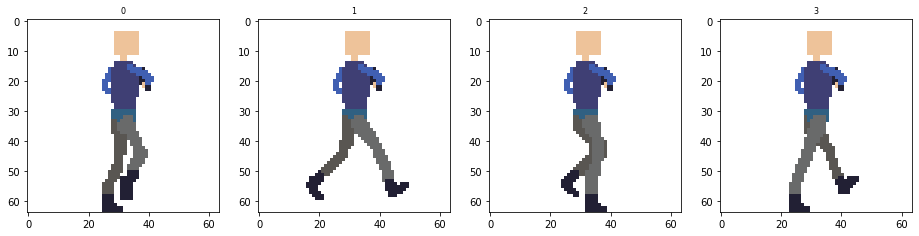

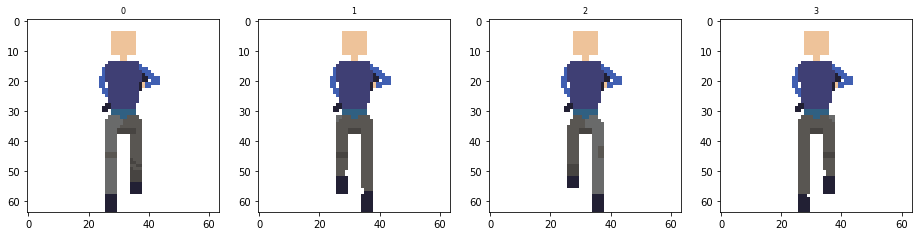

In [9]:
gunwalk(shotgun_sprites)

# smg run

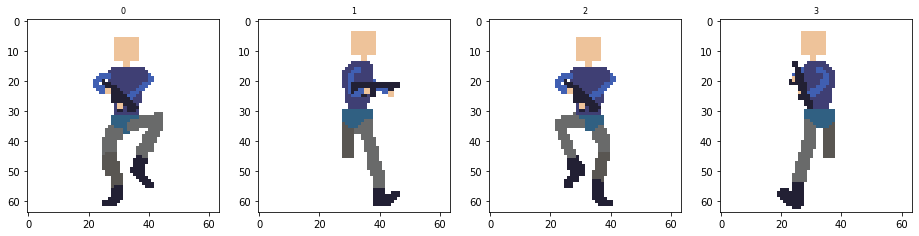

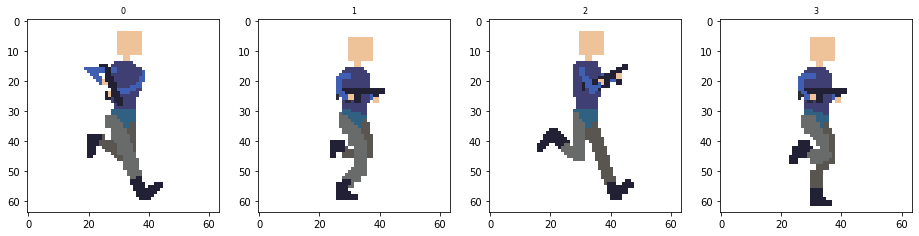

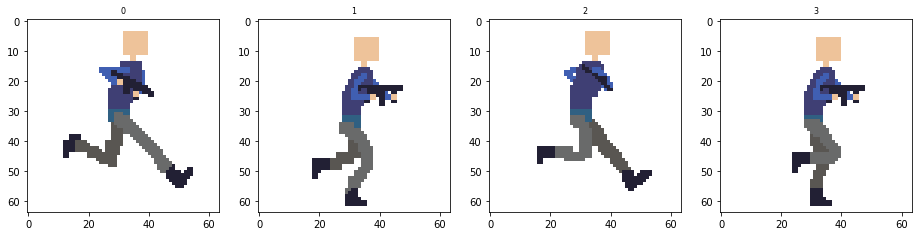

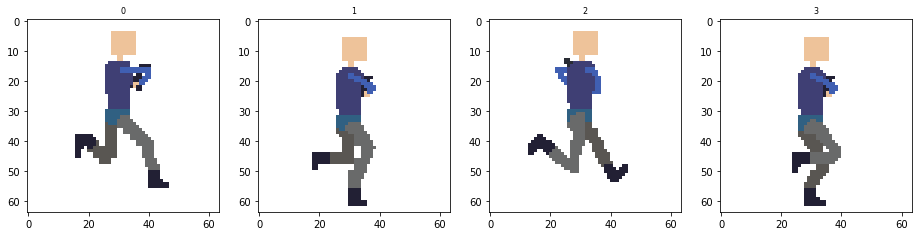

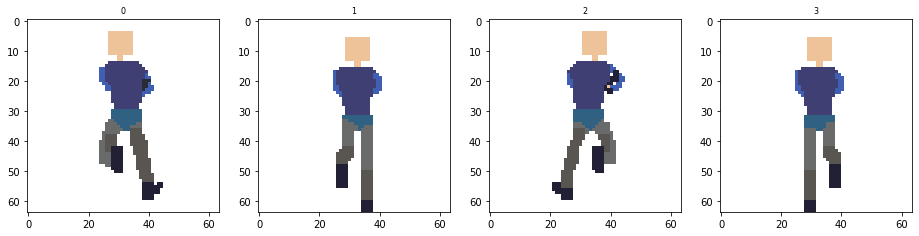

In [10]:
display_images([combine(leg_sprites[47+i], smg_sprites[50+i]) for i in range(4)])
display_images([combine(leg_sprites[51+i], smg_sprites[54+i]) for i in range(4)])
display_images([combine(leg_sprites[55+i], smg_sprites[58+i]) for i in range(4)])
display_images([combine(leg_sprites[59+i], smg_sprites[62+i]) for i in range(4)])
display_images([combine(leg_sprites[63+i], smg_sprites[66+i]) for i in range(4)])

# crouch

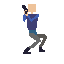

In [11]:
display(combine(leg_sprites[67], pistol_sprites[0]))

# jump

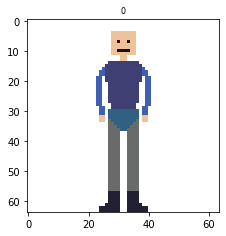

In [12]:
sprite = combine(leg_sprites[0], torso_sprites[0])
sprite = paste_head(sprite, 0)
# display(sprite)

display_images([sprite])

1. adjust torsos to shift head position to middle
2. observe differences with legs
3. adjust legs

list of nonstandard torso images
    unarmed dr *
    jump *
forbidden:
crouch
crawl
unarmed run
climb
pistol run
smg run


4. version without head
5. add head animator
    disable on the above forbidden animations
6. add offsets to sprite renderers
7. look in direction of cursor

get this all working, then:

8. do pistol
9. do smg
10. do rifle
11. do shotgun


the solution: we can leave the head in the difficult sprites, and this just means that heads will not be interchangeable.
that's probably fine because we're not doing YC3 here.